# Image Classification using CNN (Convolutional Neural Network)
## Data Set: CIFAR10

In [59]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [60]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()

In [61]:
x_train.shape

(50000, 32, 32, 3)

In [62]:
x_test.shape

(10000, 32, 32, 3)

In [63]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [64]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [65]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [66]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

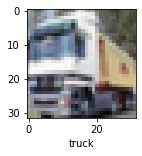

In [67]:
plot_sample(x_train,y_train,1)

In [68]:
x_train=x_train/255
x_test=x_test/255

## ANN

In [69]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4815 - accuracy: 0.4770


[1.4815293550491333, 0.47699999809265137]

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.60      0.53      1000
           1       0.73      0.44      0.55      1000
           2       0.43      0.27      0.33      1000
           3       0.38      0.32      0.35      1000
           4       0.38      0.48      0.43      1000
           5       0.51      0.25      0.34      1000
           6       0.40      0.75      0.52      1000
           7       0.62      0.45      0.52      1000
           8       0.48      0.74      0.58      1000
           9       0.61      0.46      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



## CNN

In [71]:
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)), 
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)), 
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [72]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [73]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5159 - accuracy: 0.4534
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1799 - accuracy: 0.5842
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0505 - accuracy: 0.6328
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9804 - accuracy: 0.6592
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9224 - accuracy: 0.6783
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8741 - accuracy: 0.6955
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8370 - accuracy: 0.7087
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7951 - accuracy: 0.7201
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7645 - accuracy: 0.7330
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [74]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 4ms/step - loss: 0.9075 - accuracy: 0.6918


[0.9074665904045105, 0.6917999982833862]

In [75]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [76]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

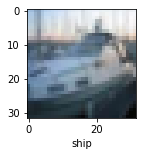

In [77]:
plot_sample(x_test,y_test, 2)

In [78]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[6.84077822e-05, 6.35252854e-06, 5.12321072e-04, 9.15109336e-01,
        8.60915519e-04, 7.96977207e-02, 1.96670881e-03, 2.65207345e-04,
        1.10735989e-03, 4.05614934e-04],
       [1.39799027e-03, 2.46133611e-01, 2.45678029e-06, 1.01982073e-06,
        8.26101640e-08, 6.58336496e-09, 1.31159039e-08, 1.17434622e-08,
        7.47642636e-01, 4.82214894e-03],
       [1.23089075e-01, 1.07798822e-01, 4.70091030e-03, 3.56826596e-02,
        3.18471668e-03, 2.47322116e-03, 5.85339672e-04, 3.42073035e-03,
        6.19841814e-01, 9.92226675e-02],
       [8.06313455e-01, 2.57159509e-02, 8.59411247e-03, 4.44327109e-03,
        8.79329443e-03, 1.99566386e-03, 2.69183474e-05, 5.25633979e-04,
        1.42484397e-01, 1.10736268e-03],
       [1.92259158e-05, 1.96195615e-04, 1.17947003e-02, 7.25982012e-03,
        2.01346129e-01, 7.75660854e-04, 7.78524160e-01, 2.25701115e-06,
        7.22226032e-05, 9.64774244e-06]], dtype=float32)

In [79]:
y_classes=[np.argmax(element) for element in y_pred] 
y_classes[:5]

[3, 8, 8, 0, 6]

In [80]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [81]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [82]:
classes
classes[y_classes[3]]

'airplane'

In [84]:
print("Classification Report: \n",classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.79      0.84      0.81      1000
           2       0.59      0.57      0.58      1000
           3       0.49      0.52      0.51      1000
           4       0.73      0.51      0.60      1000
           5       0.55      0.64      0.60      1000
           6       0.82      0.71      0.76      1000
           7       0.67      0.82      0.74      1000
           8       0.83      0.78      0.80      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

